In [ ]:
!pip install pycaret

### Import Required Packages and load data

In [1]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
data.shape

(1338, 7)

In [3]:
data_seen = data.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = data.drop(data_seen.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data_seen.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1204, 7)
Unseen Data For Predictions: (134, 7)


### Model Buliding

In [4]:
from pycaret.regression import *

### a) Setting up Environment in Pycaret

In [5]:
exp_101 = setup(data_seen, target = 'charges', session_id = 123,normalize = True,polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1204, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [6]:
exp_101[0].columns

Index(['age_Power2', 'bmi_Power2', 'sex_female', 'children_0', 'children_1',
       'children_2', 'children_3', 'children_4', 'children_5', 'smoker_no',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'age_0.0', 'age_1.0', 'age_10.0', 'age_11.0',
       'age_2.0', 'age_3.0', 'age_4.0', 'age_5.0', 'age_6.0', 'age_7.0',
       'age_8.0', 'age_9.0', 'bmi_0.0', 'bmi_1.0', 'bmi_10.0', 'bmi_11.0',
       'bmi_2.0', 'bmi_3.0', 'bmi_4.0', 'bmi_5.0', 'bmi_6.0', 'bmi_7.0',
       'bmi_8.0', 'bmi_9.0', 'region_northeast_multiply_bmi_Power2',
       'age_Power2_multiply_bmi_Power2', 'age_0.0_multiply_smoker_no',
       'children_2_multiply_bmi_Power2',
       'bmi_Power2_multiply_region_southeast', 'age_Power2_multiply_smoker_no',
       'children_0_multiply_bmi_Power2', 'children_0_multiply_age_Power2',
       'age_9.0_multiply_bmi_Power2', 'region_southeast_multiply_bmi_Power2',
       'smoker_no_multiply_bmi_Power2', 'bmi_Power2_multiply_age_7.0',
 

#### Creating List of models

In [7]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,2542.01,2.08515e+07,4490.43,0.8482,0.4364,0.3077
1,Bayesian Ridge,2956.23,2.18053e+07,4631.66,0.8427,0.4359,0.3315
2,Ridge Regression,2952.75,2.17998e+07,4630.66,0.8427,0.4366,0.3308
3,Lasso Regression,2935.61,2.18527e+07,4635.04,0.8422,0.44,0.3265
4,Gradient Boosting Regressor,2601.16,2.18808e+07,4611.13,0.841,0.4433,0.3154
5,Random Forest,2490.32,2.19388e+07,4607.38,0.8406,0.4412,0.2914
6,Lasso Least Angle Regression,2944.79,2.22416e+07,4675.04,0.8392,0.427,0.3284
7,CatBoost Regressor,2607.89,2.22483e+07,4646.41,0.8384,0.4484,0.3126
8,TheilSen Regressor,2921.99,2.30921e+07,4773.04,0.8341,0.4737,0.3014
9,Light Gradient Boosting Machine,2830.89,2.30622e+07,4726.57,0.8323,0.5118,0.3601


### Choose the top model

In [8]:
egb = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2600.7476,1.863469e+07,4316.7920,0.8813,0.4378,0.3264
1,1810.7951,7.652574e+06,2766.3287,0.9595,0.3072,0.2589
2,2474.1612,1.566832e+07,3958.3223,0.8787,0.4083,0.3278
3,3004.7836,2.922324e+07,5405.8520,0.7481,0.5352,0.3309
4,2915.7857,2.968932e+07,5448.7910,0.8121,0.4496,0.2422
5,2563.9432,1.981406e+07,4451.2992,0.8622,0.4381,0.3229
6,2757.9862,2.291073e+07,4786.5157,0.8741,0.4494,0.3484
7,2598.6851,2.268354e+07,4762.7243,0.7879,0.4478,0.3148
8,2214.1660,1.289051e+07,3590.3356,0.9363,0.4193,0.3658
9,2479.0279,2.934776e+07,5417.3569,0.7420,0.4715,0.2393


### Tuning Model

In [9]:
tune_egb = tune_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3090.5817,2.423753e+07,4923.1622,0.8456,0.5374,0.3690
1,2028.1368,9.286465e+06,3047.3702,0.9509,0.4323,0.3559
2,2711.6230,2.139526e+07,4625.5006,0.8343,0.4519,0.3492
3,3345.1788,3.505518e+07,5920.7415,0.6978,0.6031,0.3729
4,3427.3547,3.564493e+07,5970.3376,0.7744,0.5681,0.3133
5,2856.0652,2.207805e+07,4698.7284,0.8464,0.4974,0.3844
6,3297.2085,2.802744e+07,5294.0949,0.8460,0.5520,0.4353
7,2581.5740,2.217457e+07,4708.9879,0.7926,0.4647,0.3194
8,2513.2087,1.661686e+07,4076.3783,0.9179,0.4963,0.4253
9,2812.9081,3.171634e+07,5631.7263,0.7212,0.5047,0.2716


In [10]:
print(tune_egb)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=110, min_child_weight=1, missing=None, n_estimators=800,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=0)


### Plot a model

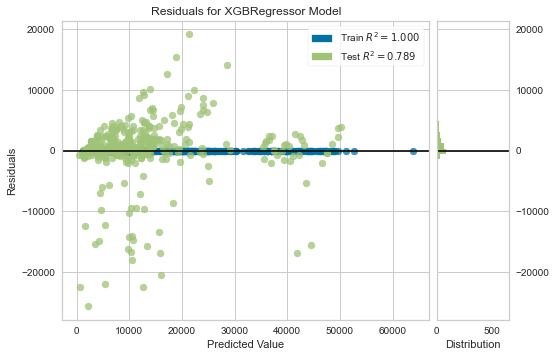

In [11]:
plot_model(tune_egb)

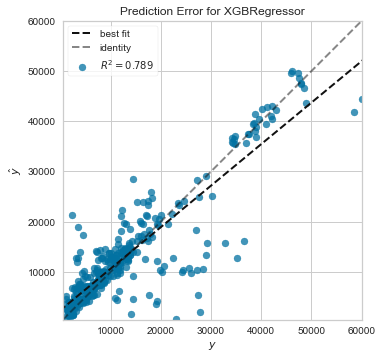

In [12]:
plot_model(tune_egb, plot = 'error')

### Feature Importance Plot

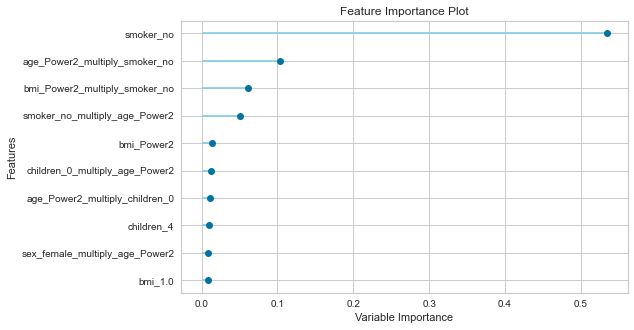

In [13]:
plot_model(tune_egb, plot='feature')

### Predict on Test/Hold-out sample

In [14]:
predict_model(tune_egb);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting Regressor,2979.9752,2.782218e+07,5274.6732,0.7892,0.5257,0.3739


### Finalized model

In [15]:
final_egb = finalize_model(tune_egb)
print(final_egb)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=110, min_child_weight=1, missing=None, n_estimators=800,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=0)


In [17]:
data_unseen.head()

,age,sex,bmi,children,smoker,region,charges
0,18,female,27.280,3,yes,southeast,18223.45120
1,35,male,17.860,1,no,northwest,5116.50040
2,59,female,34.800,2,no,southwest,36910.60803
3,36,male,33.400,2,yes,southwest,38415.47400
4,37,female,25.555,1,yes,northeast,20296.86345


In [16]:
unseen_predictions = predict_model(final_egb, data=data_unseen)
unseen_predictions.head()

,age,sex,bmi,children,smoker,region,charges,Label
0,18,female,27.280,3,yes,southeast,18223.45120,18209.554688
1,35,male,17.860,1,no,northwest,5116.50040,5116.837891
2,59,female,34.800,2,no,southwest,36910.60803,36910.628906
3,36,male,33.400,2,yes,southwest,38415.47400,38415.492188
4,37,female,25.555,1,yes,northeast,20296.86345,20296.800781


### Save model

In [19]:
save_model(final_egb,'Final Model Prod 4July2020')

Transformation Pipeline and Model Succesfully Saved


### To load a model

In [20]:
from pycaret.regression import *

In [21]:
final_egb = load_model('Final Model Prod 4July2020')

Transformation Pipeline and Model Sucessfully Loaded
[21:38:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [23]:
#final_egb

In [ ]:
data= pd.read_csv()

In [24]:
unseen_predictions = predict_model(final_egb, data=data_unseen)
unseen_predictions.head()

,age,sex,bmi,children,smoker,region,charges,Label
0,18,female,27.280,3,yes,southeast,18223.45120,18209.554688
1,35,male,17.860,1,no,northwest,5116.50040,5116.837891
2,59,female,34.800,2,no,southwest,36910.60803,36910.628906
3,36,male,33.400,2,yes,southwest,38415.47400,38415.492188
4,37,female,25.555,1,yes,northeast,20296.86345,20296.800781


In [ ]:
import requests
url = 'https://pycaret-insurance.herokuapp.com/predict_api'
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'male', 'region':'northwest'})
print(pred.json())